# Area Plots, Histograms, and Bar Charts

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Import Libraries](#0)<br>
2.  [Fetching Data](#1) <br>
3.  [Area Plots](#6) <br>
4.  [Histograms](#8) <br>
5.  [Bar Charts](#10) <br>

</div>

# Import Libraries<a id="0"></a>

In [1]:
#Import Primary modules
import numpy as np #useful for many scientific computing in Python
import pandas as pd #primary data structure library

#use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

#check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >=2.0.0

Matplotlib version:  3.5.3


# Fetching Data<a id="0"></a>

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows) from United Nation's website

In [2]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/\
IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
#look at first items in dataset
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
#print the dimensions of the dataframe
print(df_can.shape)

(195, 39)


In [5]:
#set the country name as index
df_can.set_index('Country', inplace=True)

#check first 5 elements of the changed dataframe
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [6]:
#country name now serve as indices
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [7]:
#create a list of years (1980-2013)

years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Area Plots<a id="6"></a>

In [8]:
#visualize cumulative plot (`Stacked Line Plot, `Area plot')
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

#get the top 5 entries
df_top5 = df_can.head()

#transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


To produce a stacked area plot, each column must be either all positive, or all negative values. 
That means any NAN values will default to 0.
To produce unstacked plot, set parameter `stacked` to value `False`.

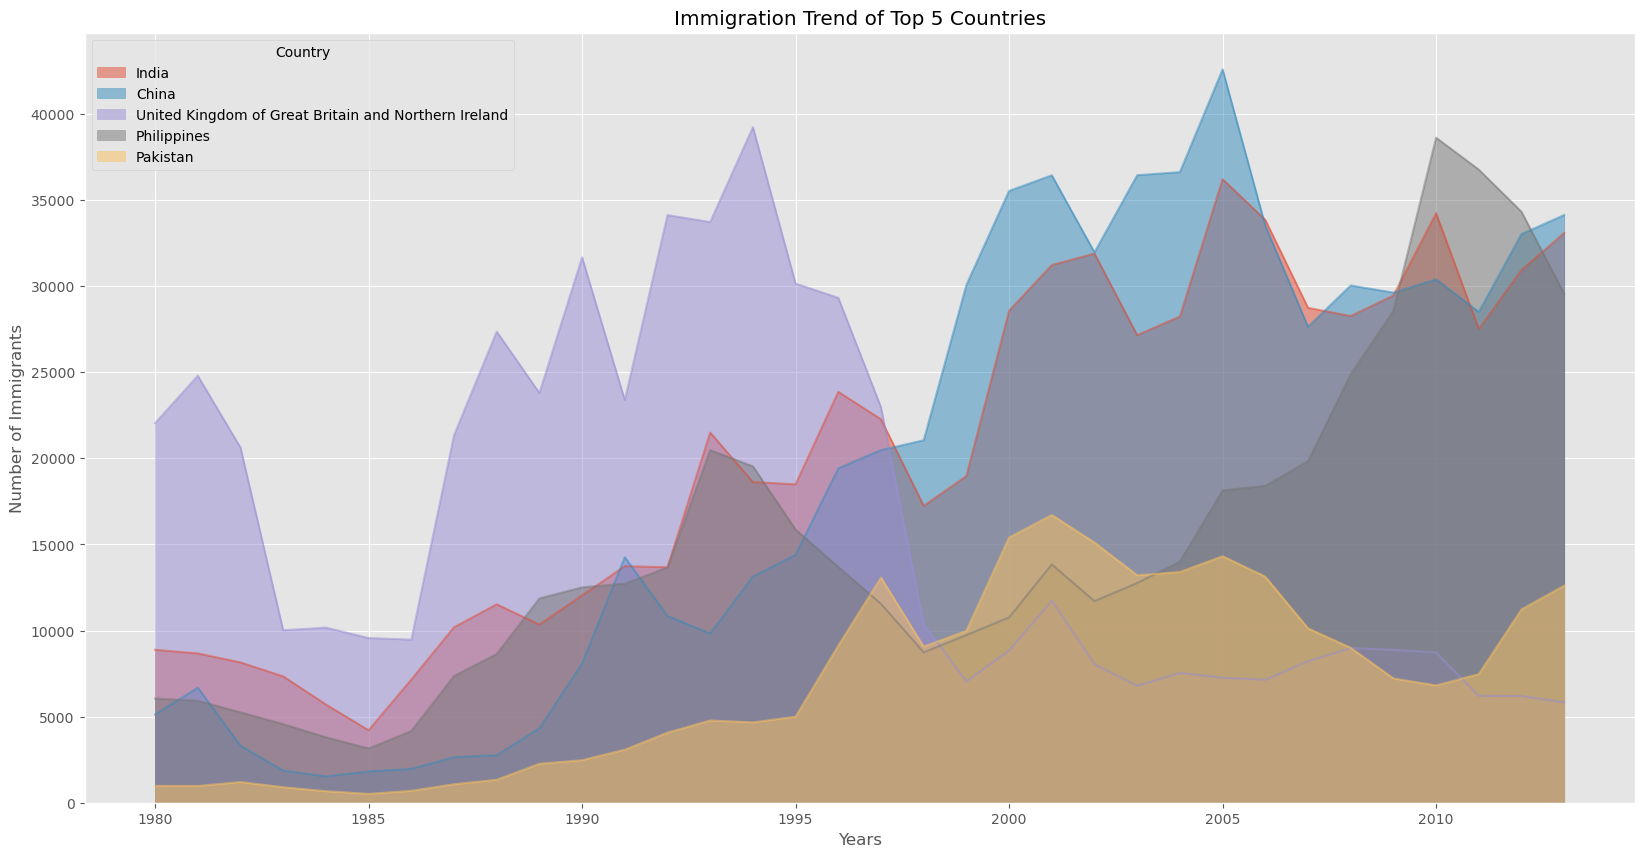

In [9]:
#change the index values of df_top5 to type integer for plottong
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

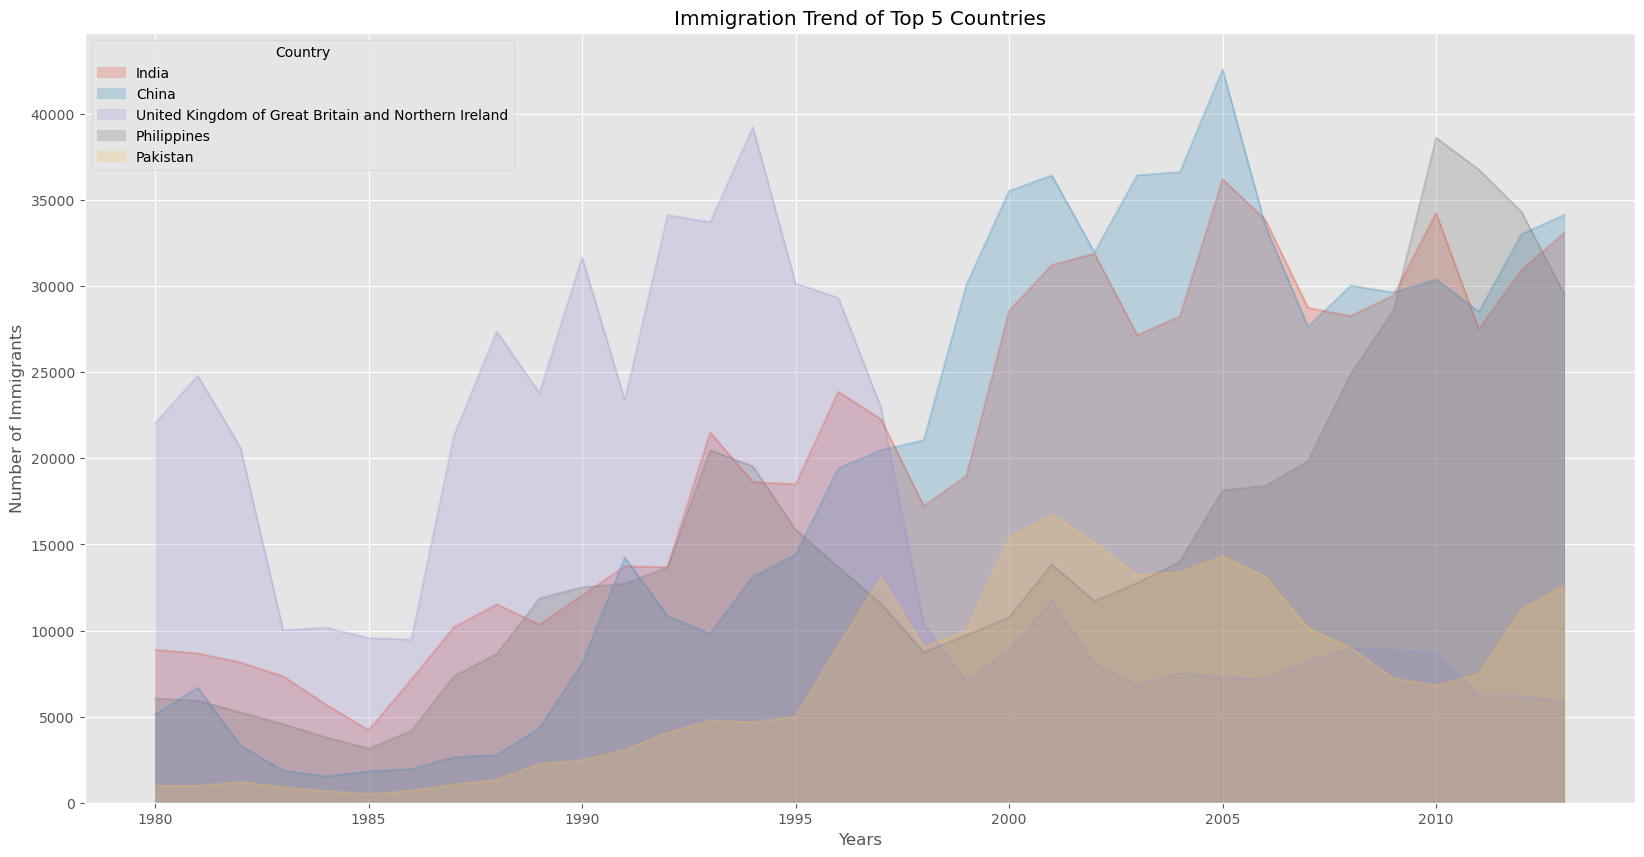

In [10]:
#unstacked plot has a default transparency (alpha value) at 0.5.
#we can modify this value by passing in the alpha parameter. 

df_top5.plot(kind='area', 
             alpha=0.25,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Two types of plotting
There are two styles/options of plotting with `matplotlib`， plotting using the Artist layer and plotting using the scripting layer.

**Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt'**

You can use `plt` i.e. `matplotlib.pyplot` and add more elements by calling different methods procedurally; for example, `plt.title(...)` to add title or `plt.xlabel(...)` to add label to the x-axis.

```python
    # Option 1: This is what we have been using so far
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')
```

**Option 2: Artist layer (Object oriented method) - using an `Axes` instance from Matplotlib (preferred)**

You can use an `Axes` instance of your current plot and store it in a variable (eg. `ax`). You can add more elements by calling methods with a little change in syntax (by adding "`set_`" to the previous methods). For example, use `ax.set_title()` instead of `plt.title()` to add title,  or `ax.set_xlabel()` instead of `plt.xlabel()` to add label to the x-axis.

This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots, as you will see later).

Text(0.5, 0, 'Years')

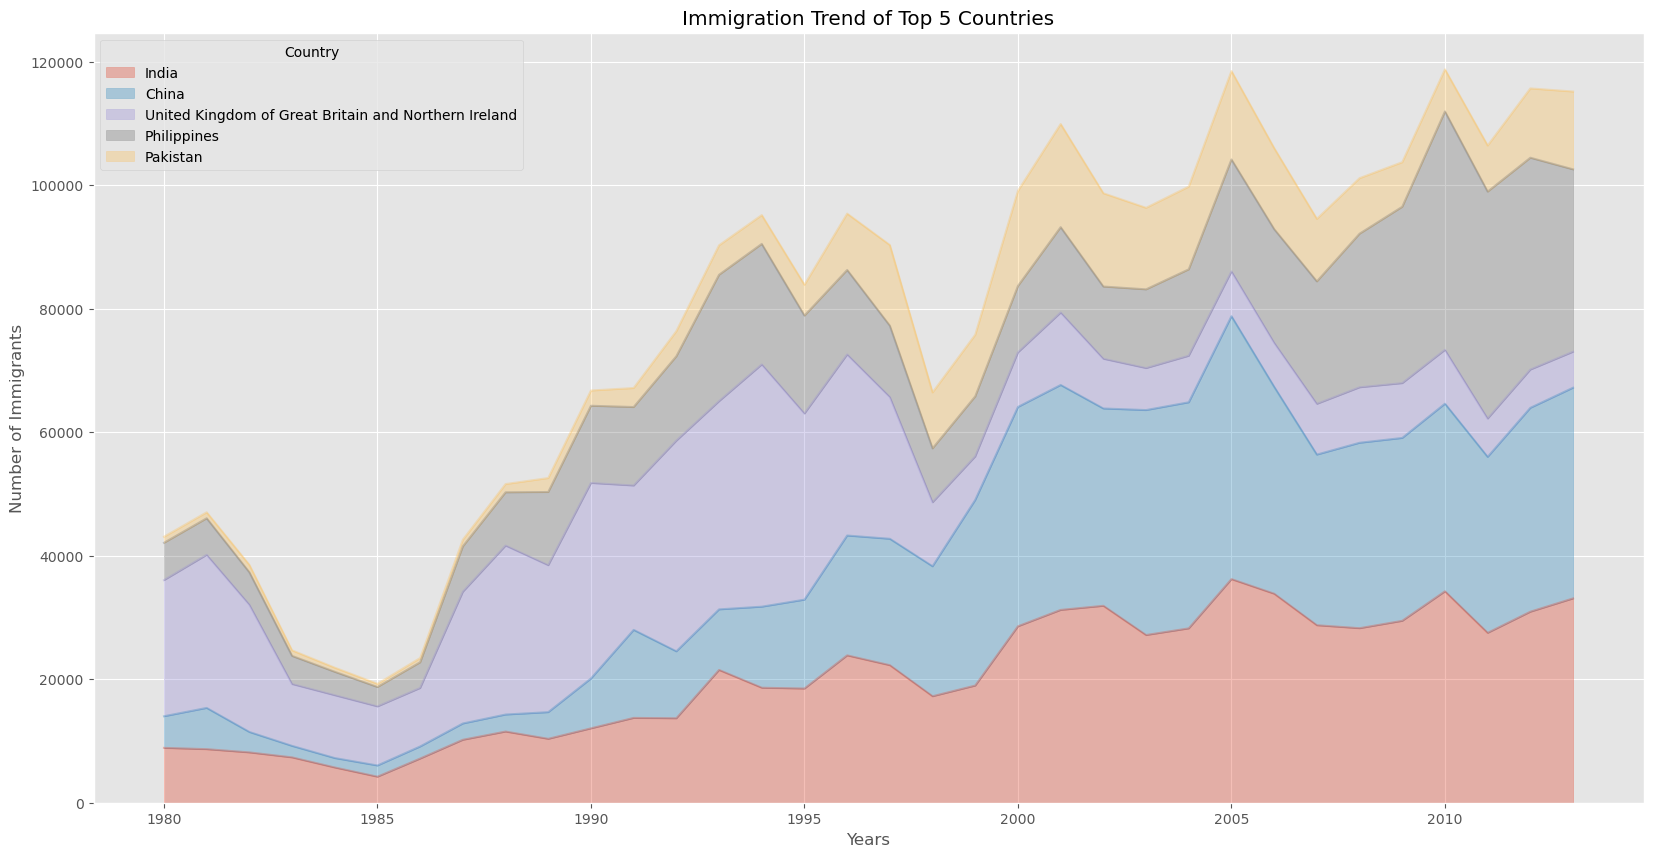

In [11]:
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

**Task:** Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada (1980-2013). Use transparency value of 0.45.

Data read into a pandas dataframe!


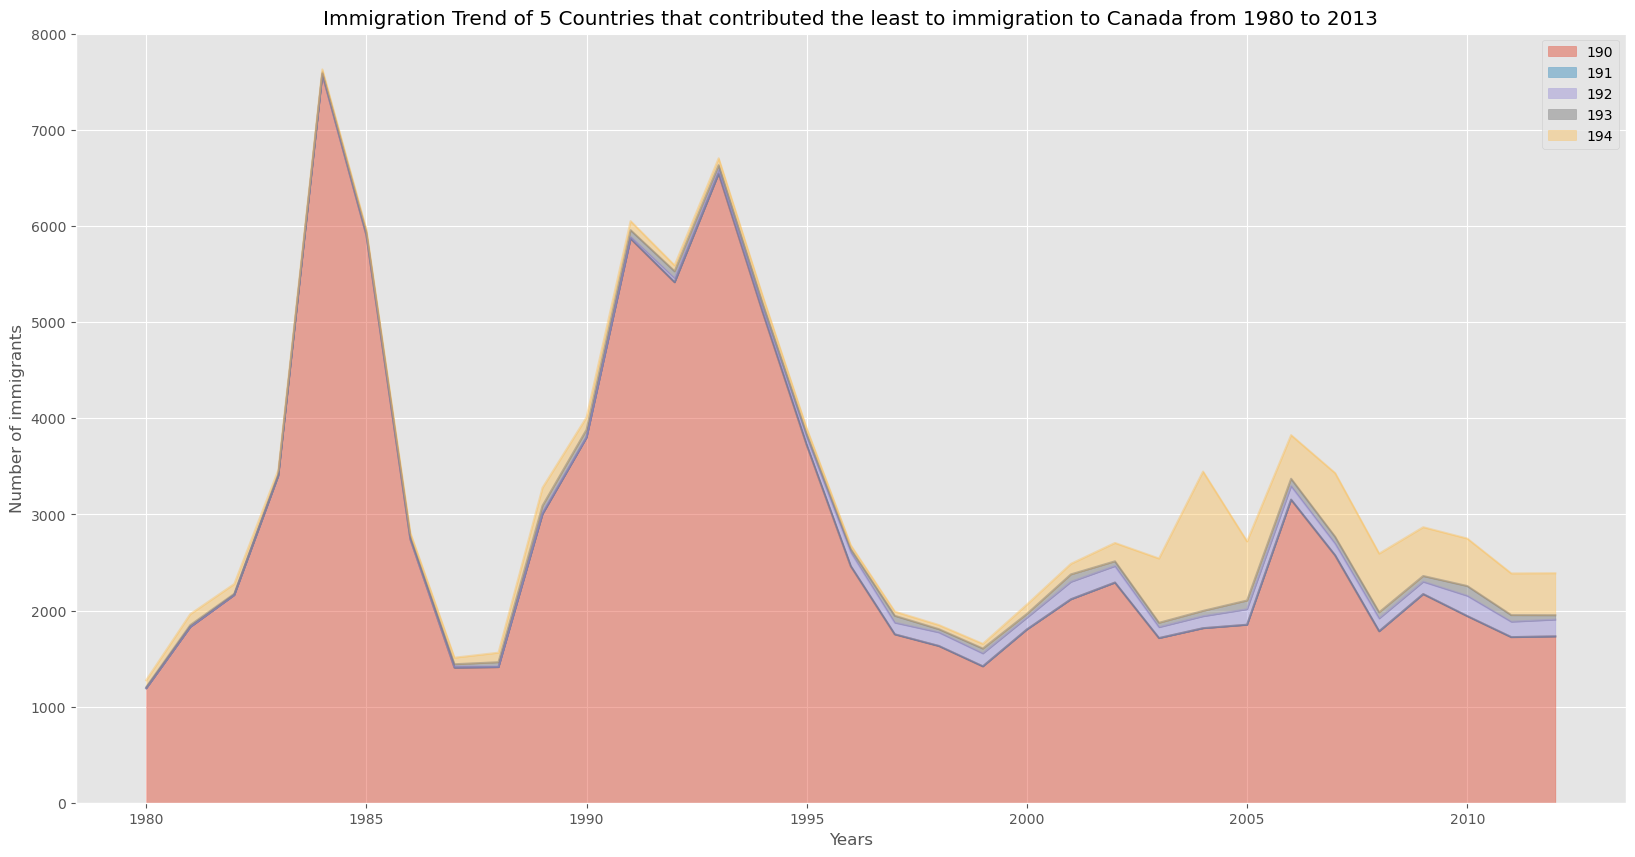

In [12]:
#visualize cumulative plot (`Stacked Line Plot, `Area plot')
import pandas as pd
import matplotlib.pyplot as plt
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/\
IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
print('Data read into a pandas dataframe!')
df_can.tail()
years = list(map(str, range(1980, 2013)))
years

#get the top 5 entries
df_bottom5 = df_can.tail(5)

#transpose the dataframe
df_bottom5 = df_bottom5[years].transpose()
df_bottom5.head()

df_bottom5.index = df_bottom5.index.map(int)
df_bottom5.plot(kind='area', alpha=0.45, figsize=(20, 10))

plt.title('Immigration Trend of 5 Countries that contributed the least to immigration to Canada from 1980 to 2013')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

**Task:** Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. USe Transparency value of 0.55. 

Text(0.5, 0, 'Years')

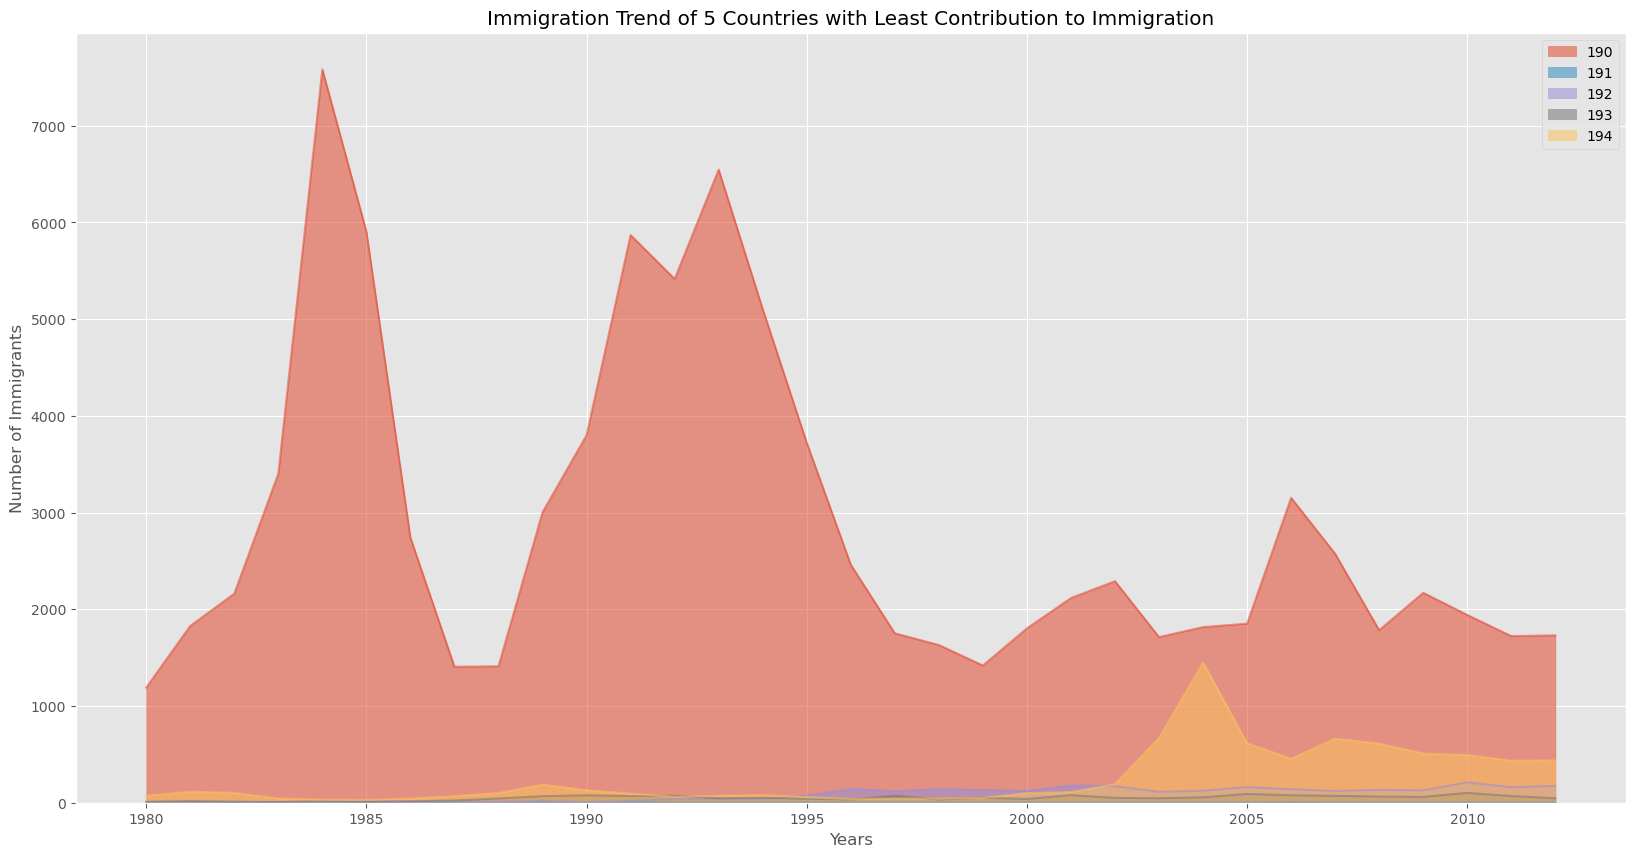

In [13]:
ax = df_bottom5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))

ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

# Histograms<a id="8"></a>

Histogram is a way of representing the frequency distribution of numeric dataset. 

**Task:** to check the frequency distribution of the number(population) of new immigrants from the various countries to Canada in 2013

In [16]:
#examine data
df_can['2013'].head()

0    2004
1     603
2    4331
3       0
4       1
Name: 2013, dtype: int64

In [18]:
#np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) #frequency count
print(bin_edges) #bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


The `histogram` method breaks up the dataset in 10 bins. 

Summary of the bin ranges and the frequency distribution of immigration in 2013: 
* 178 countries contributed between 0 and 3412.9 immigrants
* 11 countries contributed between 3412.9 to 6825.8 immigrants
* 1 country contributed between 6285.8 to 102387 immigrants etc. 

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%202/images/Mod2Fig1-Histogram.jpg" align="center" width="800">

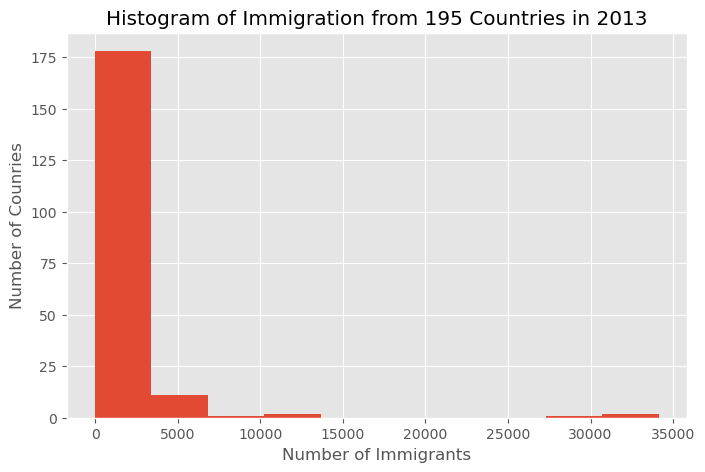

In [20]:
#graph this distribution by passing kind=hist to plot()
df_can['2013'].plot(kind='hist', figsize=(8, 5))

#add a title to histogram
plt.title('Histogram of Immigration from 195 Countries in 2013')
#add y-label
plt.ylabel('Number of Counries')
#add x-label
plt.xlabel('Number of Immigrants')

plt.show()

In the above plot the x-axis represents the population range of immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the population. 
X-axis do not match the bin size. This can be fixed by passing a xticks keyword that contains the list of the bin sizes

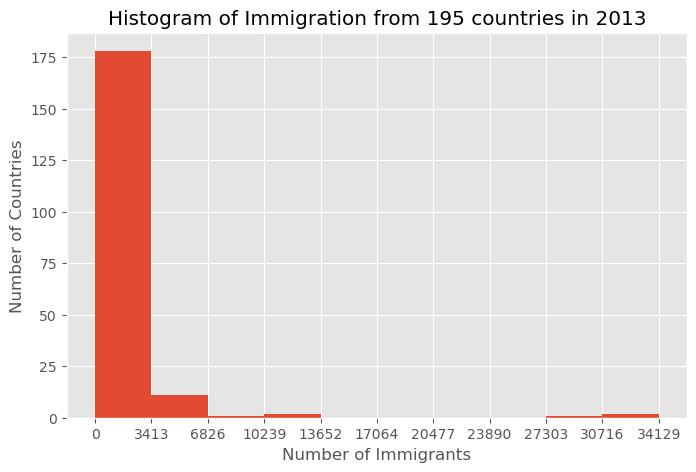

In [23]:
#bin edges is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])
                                
df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

**Task:** to check the immigration distribution of Denmark, Norway, and Sweden for years 1980-2013. 

In [ ]:
#review the dataset
years = list(map(str, range(1980, 2013)))
years
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

In [ ]:
#generate histogram
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

In [ ]:
#transpode dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

In [ ]:
#generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [ ]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

# Bar Charts (Dataframe) <a id="10"></a>

A bar plot is a way of representimg data where the length of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and caregorical variables grouped in intervals. 
To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:
* `kind=bar`creates a *vertical* bar plot
* `kind=barh` create a *horizontal* bar plot

**Vertical bar plot**

In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particularly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar.

**Task: analysis of the effect of Iceland's Financial Crisis:**

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

**Question:** Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [ ]:
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

In [ ]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

Annotate this on the plot using the `annotate` method of the **scripting layer** or the **pyplot interface**. We will pass in the following parameters:

*   `s`: str, the text of annotation.
*   `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
*   `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
*   `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
*   `arrowprops`: Takes a dictionary of properties to draw the arrow:
    *   `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    *   `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    *   `color`: Specifies color of arrow.
    *   `lw`: Specifies the line width.

In [ ]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

Annotate a text to go over the arrow. Pass in the following additional parameters:

*   `rotation`: rotation angle of text in degrees (counter clockwise)
*   `va`: vertical alignment of text \[‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
*   `ha`: horizontal alignment of text \[‘center’ | ‘right’ | ‘left’]

In [ ]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

**Horizontal Bar Plot**

In horizontal bar graphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. 

**Question:** Using the scripting later and the `df_can` dataset, create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.


**Task:** get the data pertaining to the top 15 countries

In [46]:
# sort dataframe on 'Total' column (descending)
df_can.sort_values(by='Total', ascending=True, inplace=True)

# get top 15 countries
df_top15 = df_can['Total'].tail(15)
df_top15

142     93585
190     97146
86     106431
63     109091
96     115359
137    139241
140    142581
162    148358
81     175923
185    241122
130    241600
136    511391
183    551500
36     659962
79     691904
Name: Total, dtype: int64

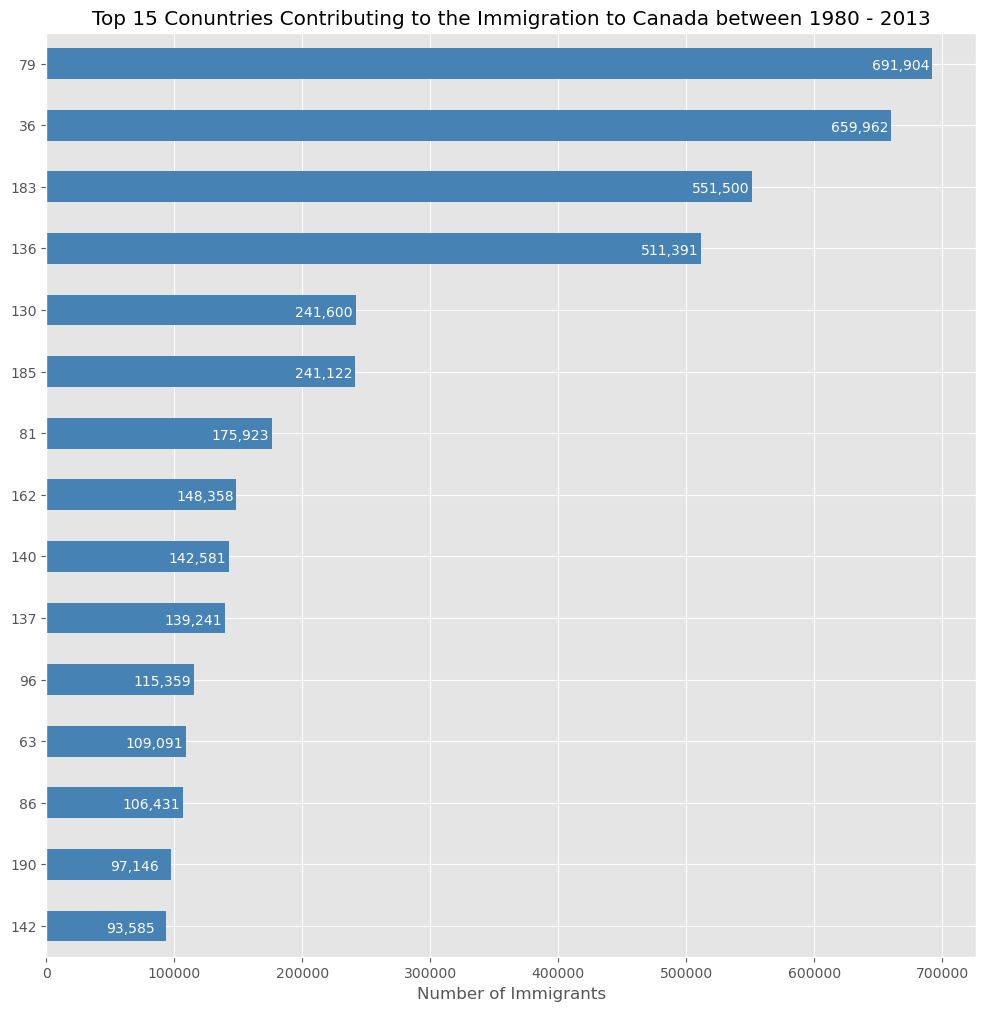

In [47]:
#Step 2: Plot data:

#Use kind='barh' to generate a bar chart with horizontal bars.
#Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
#Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.
   # generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()